# Assignment 1



In [35]:
import numpy as npy
import pandas as pds
#import matplotlib.pyplot as plt

In [36]:
import tensorflow as tsf

In [37]:
print("Built with TensorFlow version: {}".format(tsf.__version__))


Built with TensorFlow version: 1.14.0


In [38]:
#Reading 'data' from excel book using pandas
xls   = pds.ExcelFile('IS4003_SCS4104_CS4104_dataset.xlsx')
training_ds = pds.read_excel(xls, 'Training Dataset')
testing_ds  = pds.read_excel(xls, 'Testing Dataset')

In [39]:
training_ds.head(10)

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes
5,6,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,Yes
6,7,26,Female,0.9,0.2,154,16,12,7,3.5,1,Yes
7,8,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,Yes
8,9,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,No
9,10,55,Male,0.7,0.2,290,53,58,6.8,3.4,1,Yes


In [40]:
#Delete 'ID' column 
del training_ds['ID']
del testing_ds['ID']

In [41]:
#Identify features and labels
column_names = ['Age','Gender','TB','DB','ALK','SGPT','SGOT','TP','ALB','AG_Ratio','Class']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

class_names= ['Yes', 'No']

Features: ['Age', 'Gender', 'TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio']
Label: Class


In [42]:
#Replace "?" mark data with NaN values
training_ds.replace('?', npy.NaN, inplace=True)
testing_ds.replace('?', npy.NaN, inplace=True)



In [43]:
#Check the availability of "?" mark data
print (training_ds.astype(str) != '?')
print (testing_ds.astype(str) != '?')

      Age  Gender    TB    DB   ALK  SGPT  SGOT    TP   ALB  AG_Ratio  Class
0    True    True  True  True  True  True  True  True  True      True   True
1    True    True  True  True  True  True  True  True  True      True   True
2    True    True  True  True  True  True  True  True  True      True   True
3    True    True  True  True  True  True  True  True  True      True   True
4    True    True  True  True  True  True  True  True  True      True   True
..    ...     ...   ...   ...   ...   ...   ...   ...   ...       ...    ...
578  True    True  True  True  True  True  True  True  True      True   True
579  True    True  True  True  True  True  True  True  True      True   True
580  True    True  True  True  True  True  True  True  True      True   True
581  True    True  True  True  True  True  True  True  True      True   True
582  True    True  True  True  True  True  True  True  True      True   True

[583 rows x 11 columns]
      Age  Gender    TB    DB   ALK  SGPT  SGOT    

In [44]:
#Check for NaN values of data frame
training_ds.isnull().values.any()
testing_ds.isnull().values.any()


True

In [45]:
training_ds.mean()
testing_ds.mean()

Age          45.372990
TB            3.836482
DB            1.726299
ALK         277.812298
SGPT         77.844156
SGOT        103.734628
TP            6.634516
ALB           3.199032
AG_Ratio      0.937735
dtype: float64

In [46]:
#fill NaN value with mean value
training_ds.fillna(training_ds.mean(),inplace=True)
testing_ds.fillna(testing_ds.mean(),inplace=True)

In [47]:
#Check for NaN values of data frame
training_ds.isnull().values.any()
testing_ds.isnull().values.any()


False

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [49]:
# Convert Categorical Data Into Numeric Data
# Using OneHotEncoding
gender_training_ds = pds.get_dummies(training_ds, columns=['Gender'], drop_first=True)
gender_testing_ds = pds.get_dummies(testing_ds, columns=['Gender'], drop_first=True)
class_training_ds = pds.get_dummies(gender_training_ds, columns=['Class'], drop_first=True)
class_testing_ds = pds.get_dummies(gender_testing_ds, columns=['Class'], drop_first=True)

In [50]:
class_training_ds.head(10)

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Male,Class_Yes
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0,1
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1
5,46,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1,1
6,26,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,0,1
7,29,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,0,1
8,17,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,1,0
9,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1,1


In [51]:
class_training_ds.head()

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Male,Class_Yes
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0,1
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [52]:
#Remove 'Class' column
train_y = class_training_ds.pop('Class_Yes')
test_y= class_testing_ds.pop('Class_Yes')

In [53]:
class_training_ds.head()

,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Male
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [54]:
#Filter labels for train and test data sets and get them into an aray
training_ds_labels = npy.array(train_y)
testing_ds_labels = npy.array(test_y)


### Create a model using Keras


In [55]:
# The model created with 3 layers each has 128, 30, and 20 nodes.
# relu and sigmoid as activation functions
# Optimizer: Adam , Loss function: binary cross entropy

def create_model( output_bias=None):
    my_model = tsf.keras.Sequential([
      tsf.keras.layers.Dense(128, activation='relu', 
                            input_shape=(class_training_ds.shape[-1],)),
      tsf.keras.layers.Dense(30, activation='relu'),
      tsf.keras.layers.Dense(20, activation='relu'),
      tsf.keras.layers.Dropout(0.5),
      tsf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    ])
    
    my_model.compile(
      optimizer=('adam'),
      loss=tsf.keras.losses.BinaryCrossentropy(),
      metrics=['accuracy'])

    return my_model

#number of iterations
#number of data for each step
EPOCHS = 600    
BATCH_SIZE = 32 

my_model = create_model()

### Using the model



In [56]:
 my_model.fit(class_training_ds,
          training_ds_labels,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)


Epoch 1/600
583/583 [==============================] - 0s 310us/sample - loss: 5.2774 - acc: 0.6158
Epoch 2/600
583/583 [==============================] - 0s 58us/sample - loss: 1.6086 - acc: 0.6312
Epoch 3/600
583/583 [==============================] - 0s 67us/sample - loss: 0.6342 - acc: 0.6792
Epoch 4/600
583/583 [==============================] - 0s 62us/sample - loss: 0.6002 - acc: 0.7136
Epoch 5/600
583/583 [==============================] - 0s 60us/sample - loss: 0.5834 - acc: 0.7136
Epoch 6/600
583/583 [==============================] - 0s 68us/sample - loss: 0.5956 - acc: 0.7118
Epoch 7/600
583/583 [==============================] - 0s 65us/sample - loss: 0.5704 - acc: 0.7136
Epoch 8/600
583/583 [==============================] - 0s 67us/sample - loss: 0.5817 - acc: 0.7136
Epoch 9/600
583/583 [==============================] - 0s 65us/sample - loss: 0.5780 - acc: 0.7136
Epoch 10/600
583/583 [==============================] - 0s 62us/sample - loss: 0.5686 - acc: 0.7136
Epoch 11

In [57]:
results = my_model.evaluate(class_training_ds, training_ds_labels)
print("Loss: {:0.4f}".format(results[0]), "Accuracy: {:0.4f}".format(results[1]))


583/583 [==============================] - 0s 115us/sample - loss: 0.4347 - acc: 0.7307
Loss: 0.4347 Accuracy: 0.7307


In [58]:
my_model.predict(class_training_ds[:12])

array([[0.5142784 ],
       [0.99949074],
       [0.99789083],
       [0.5195374 ],
       [0.99999666],
       [0.6252624 ],
       [0.5513109 ],
       [0.64236134],
       [0.52876127],
       [0.824805  ],
       [0.53712463],
       [0.9986952 ]], dtype=float32)

In [59]:
results = my_model.evaluate(class_testing_ds, testing_ds_labels)
print("Loss: {:0.4f}".format(results[0]), "Accuracy: {:0.4f}".format(results[1]))


311/311 [==============================] - 0s 90us/sample - loss: 0.4234 - acc: 0.7235
Loss: 0.4234 Accuracy: 0.7235


In [60]:
# Make Predictions
train_predictions = my_model.predict(class_training_ds)
test_predictions = my_model.predict(class_testing_ds)


In [61]:
import matplotlib.pyplot as plt

Text(0.5, 60.0, 'Predicted Values')

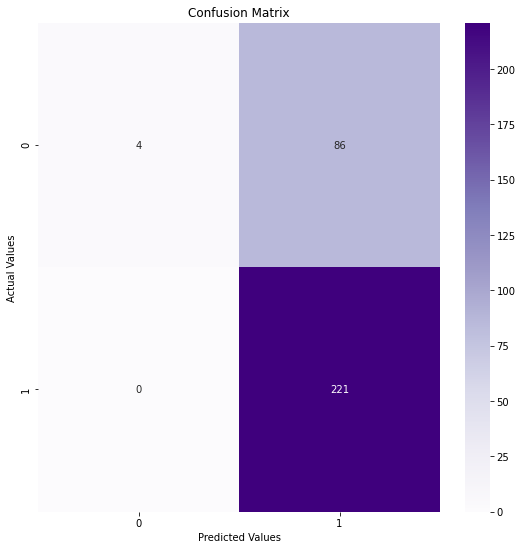

In [62]:
# Create Confutsion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sbn
cm = confusion_matrix(testing_ds_labels, test_predictions >0.5)
plt.figure(figsize=(9,9))
sbn.heatmap(cm, annot=True, fmt="d", cmap= "Purples")
plt.title('Confusion Matrix'.format(0.5))
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [63]:
#Get classification Report
from sklearn.metrics import classification_report
print (classification_report(testing_ds_labels,test_predictions>0.5))

              precision    recall  f1-score   support

           0       1.00      0.04      0.09        90
           1       0.72      1.00      0.84       221

    accuracy                           0.72       311
   macro avg       0.86      0.52      0.46       311
weighted avg       0.80      0.72      0.62       311



In [64]:
#Get Accuracy value
from sklearn.metrics import accuracy_score
print (accuracy_score(testing_ds_labels,test_predictions>0.5))


0.7234726688102894
